In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("praneet0327/brain-tumor-dataset")

print("Path to dataset files:", path)

C:\Users\mathe\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\mathe\.cache\kagglehub\datasets\praneet0327\brain-tumor-dataset\versions\1


In [2]:
# importando bibliotecas

import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
import cv2
import warnings
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import random

*extraindo o dataset*

In [6]:

DATA_DIR = "C:/Users/mathe/Downloads/archive/Brain_Tumor_Dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
classes = os.listdir(DATA_DIR)
print(classes)

total_image = 0
for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    if os.path.isdir(cls_path):
        num_image = len(os.listdir(cls_path))
        total_image += num_image
        print(f"{num_image} images in {cls_path}")

print(f"\nTotal de images: {total_image}")


['Negative', 'Positive']
2000 images in C:/Users/mathe/Downloads/archive/Brain_Tumor_Dataset\Negative
3266 images in C:/Users/mathe/Downloads/archive/Brain_Tumor_Dataset\Positive

Total de images: 5266


Found 5266 files belonging to 2 classes.


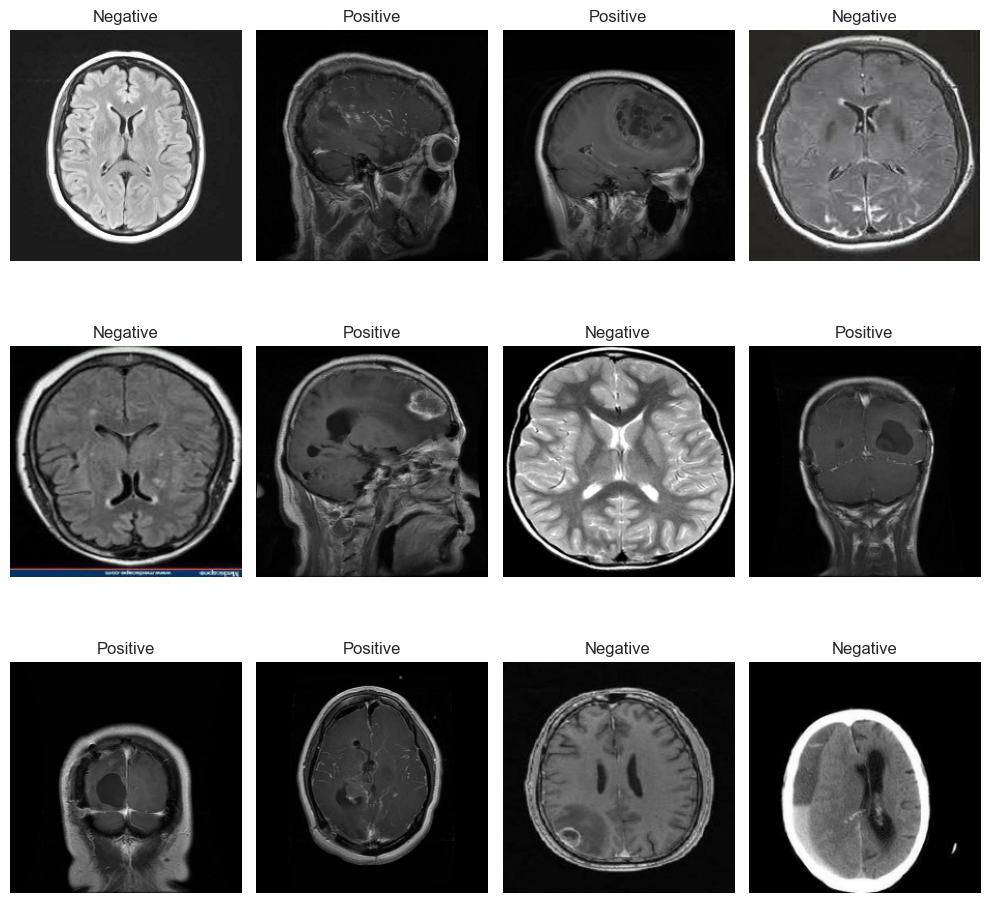

In [7]:

# creat a data set

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",
    label_mode="int",          # 0,1
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# imagens

plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes[label_batch[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
 # processing


